In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming filtered_data is the DataFrame from the previuos notebook
%store -r filtered_data
# Identify categorical and numerical columns
categorical_columns = filtered_data.select_dtypes(include=['object']).columns
numerical_columns = filtered_data.select_dtypes(include=['int', 'float']).columns

# Manual one-hot encoding using pandas get_dummies
encoded_categorical_df = pd.get_dummies(filtered_data[categorical_columns])

# Manual MinMax scaling
scaled_numerical_df = (filtered_data[numerical_columns] - filtered_data[numerical_columns].min()) / (filtered_data[numerical_columns].max() - filtered_data[numerical_columns].min())

# Concatenation of encoded categorical and scaled numerical DataFrames
processed_data = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# using min max sxcaling on regression


In [2]:
     
X = processed_data.drop(['risk','Sex_M','Smoking_yes','Heart rate data used_0.0'], axis=1)
y = processed_data['risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
}

hyperparams = {
    'Linear Regression': {'fit_intercept': [True, False]},
    'SVR': {'C': [1, 10], 'gamma': [0.1, 0.01], 'kernel': ['rbf', 'linear'],'epsilon': [0.1,0.15]},
}


# Perform hyperparameter tuning for each model
results = {}
model_scores = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, hyperparams[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    print(f"Scores for {model_name}:")
    results = grid_search.cv_results_
    for mean_score, params in zip(results['mean_test_score'], results['params']):
        r2_scores = 1 - (mean_score * -1) / np.var(y_train)  # Calculate R2 score
        #print(f"Hyperparameters: {params} R2 score: {r2_scores}")
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = {'MSE': mse, 'R2': r2 , 'params' : best_params}


# Print the MSE and R2 for each model
for model, scores in model_scores.items():
    print(f"Model: {model} Params: {scores['params']}, MSE: {scores['MSE']}, R2: {scores['R2']}")




Scores for Linear Regression:
Scores for SVR:
Model: Linear Regression Params: {'fit_intercept': True}, MSE: 0.010484080513800361, R2: 0.6482546175366832
Model: SVR Params: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}, MSE: 0.006325162579254748, R2: 0.7877880918928446


#
Scores for Linear Regression:
Hyperparameters: {'fit_intercept': True} R2 score: 0.7124875466089557
Hyperparameters: {'fit_intercept': False} R2 score: 0.4163624843319855
Scores for SVR:
Hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} R2 score: 0.7257665010554808
Hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'} R2 score: 0.7104143725149227
Hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} R2 score: 0.470668314170834
Hyperparameters: {'C': 1, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'} R2 score: 0.7104143725149227
Hyperparameters: {'C': 1, 'epsilon': 0.15, 'gamma': 0.1, 'kernel': 'rbf'} R2 score: 0.6051080948364613
Hyperparameters: {'C': 1, 'epsilon': 0.15, 'gamma': 0.1, 'kernel': 'linear'} R2 score: 0.6085207878883234
Hyperparameters: {'C': 1, 'epsilon': 0.15, 'gamma': 0.01, 'kernel': 'rbf'} R2 score: 0.3410312463112869
Hyperparameters: {'C': 1, 'epsilon': 0.15, 'gamma': 0.01, 'kernel': 'linear'} R2 score: 0.6085207878883234
#
fit tested data
Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'} R2 score: 0.7889972675064136
#
Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'} R2 score: 0.7134208126064125
Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'} R2 score: 0.7001499954961327
Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'} R2 score: 0.7134208126064125
Hyperparameters: {'C': 10, 'epsilon': 0.15, 'gamma': 0.1, 'kernel': 'rbf'} R2 score: 0.6413327026338275
Hyperparameters: {'C': 10, 'epsilon': 0.15, 'gamma': 0.1, 'kernel': 'linear'} R2 score: 0.6088632262522885
Hyperparameters: {'C': 10, 'epsilon': 0.15, 'gamma': 0.01, 'kernel': 'rbf'} R2 score: 0.6033860650273662
Hyperparameters: {'C': 10, 'epsilon': 0.15, 'gamma': 0.01, 'kernel': 'linear'} R2 score: 0.6088632262522885



In [4]:
svr_model=best_model
# not proceeding with linear regression as the relationships may be non linear and also the fit is lower than SVR

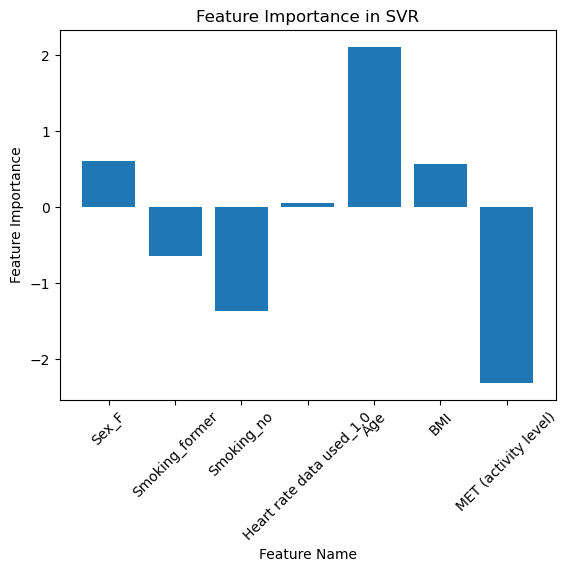

In [5]:
support_vectors = svr_model.support_
dual_coefficients = svr_model.dual_coef_

# Calculate feature importance
feature_importance = np.dot(dual_coefficients, svr_model.support_vectors_)

# Visualize feature importance

feature_names = X_train.columns.tolist()

plt.bar(feature_names, feature_importance[0])
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in SVR')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

#
Doing Feature selection
#

In [6]:
for column_to_drop in X_train.columns:
    svr_model = SVR(C=10, epsilon=0.1, gamma=0.1, kernel='rbf')
    svr_model.fit(X_train.drop(column_to_drop, axis=1),y_train)

    y_pred = svr_model.predict(X_test.drop(column_to_drop,axis=1))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Column dropped {column_to_drop} , R2: {r2} , params : {best_params}")



Column dropped Sex_F , R2: 0.6364731911125514 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped Smoking_former , R2: 0.6746950655023125 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped Smoking_no , R2: 0.3202761360292409 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped Heart rate data used_1.0 , R2: 0.7916462241318554 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped Age , R2: 0.49370641096648415 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped BMI , R2: 0.793302024151203 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Column dropped MET (activity level) , R2: 0.6938785051233675 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


Columns dropped ['BMI', 'Heart rate data used_1.0'] , R2: 0.8068372064469246 , params : {'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


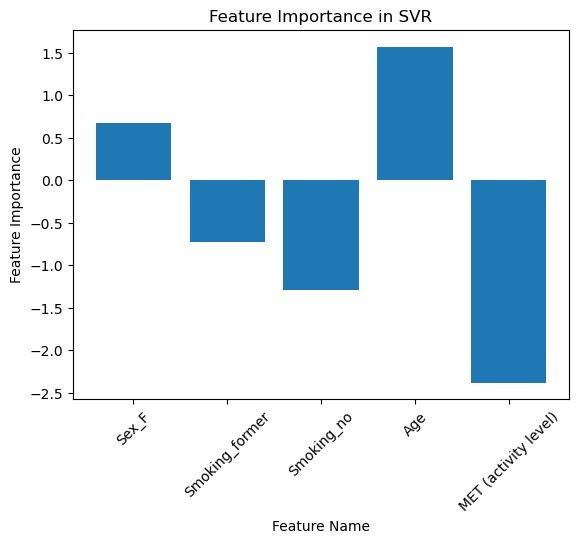

In [7]:
columns_to_drop = ['BMI','Heart rate data used_1.0']
svr_model.fit(X_train.drop(columns_to_drop, axis=1),y_train)
y_pred = svr_model.predict(X_test.drop(columns_to_drop,axis=1))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Columns dropped {columns_to_drop} , R2: {r2} , params : {best_params}")
support_vectors = svr_model.support_
dual_coefficients = svr_model.dual_coef_

# Calculate feature importance
feature_importance = np.dot(dual_coefficients, svr_model.support_vectors_)

# Visualize feature importance

feature_names = X_train.drop(columns_to_drop,axis=1).columns.tolist()

plt.bar(feature_names, feature_importance[0])
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in SVR')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()